# Assignment 2

## simple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

exercise 2

* perform data pre-processing

In [2]:
# reading data

d = pd.read_csv('E:\LABS\data_set\Bengaluru_House_Data.csv', sep=",")
df = pd.DataFrame(d[['total_sqft','price']])


# Define a function to clean data
def clean_sqft(x):
    if '-' in x:
        tokens = x.split('-')
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(clean_sqft)

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors="coerce")

df.dropna(subset=['total_sqft'], inplace=True)

normalized_df = (df - df.mean()) / df.std()
normalized_df

,total_sqft,price
0,-0.406674,-0.492275
1,0.840091,0.050623
2,-0.096597,-0.338455
3,-0.031191,-0.117083
4,-0.290395,-0.412246
...,...,...
13315,1.528880,0.795237
13316,1.647581,1.928930
13317,-0.338037,-0.351872
13318,2.526938,2.519256


exercise 1

* draw a scatter plot for the data mentioned for given attributes.

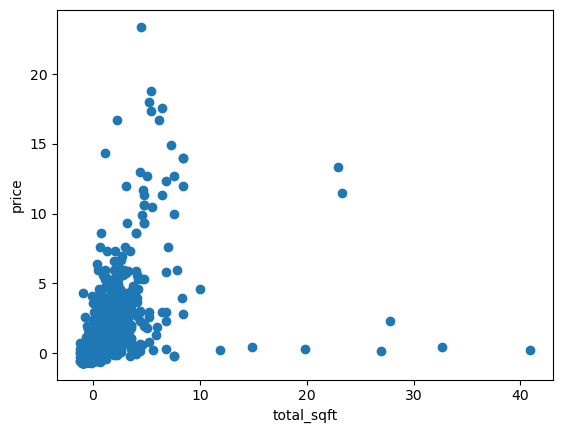

In [3]:
plt.scatter(normalized_df['total_sqft'], normalized_df['price'])
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [4]:
x = normalized_df['total_sqft'].values
y = normalized_df['price'].values

Exercise 3:

* Performs gradient descent to learn `theta`. (using the library and without using the library). Compare the values of `theta` in both cases.

In [5]:
# Performs gradient descent to learn theta, without using the library

Theta_1 = 0
Theta_0 = 0

L = 0.001
epochs = 1000

n = float(len(x))

for i in range(epochs):
    y_pred = Theta_1*x + Theta_0
    d_theta_1 = (-2/n) * sum(x * (y - y_pred))
    d_theta_0 = (-2/n) * sum(y - y_pred)
    Theta_1 = Theta_1 - L * d_theta_1
    Theta_0 = Theta_0 - L * d_theta_0

print("Theta without using library: ", Theta_1, Theta_0)

Theta without using library:  0.49780982315830247 4.607413842745592e-17


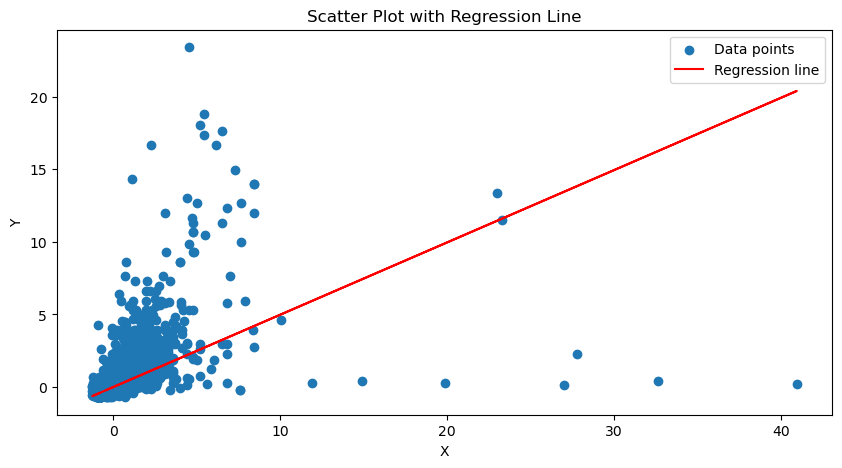

In [6]:
regression_line = Theta_1 * x + Theta_0

# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(x, regression_line, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [7]:
# Performs gradient descent to learn theta, using the library

from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
x = x.reshape(-1, 1)  # Reshape to fit the model
model.fit(x, y)

# Get the learned coefficients (theta)
theta_1_library = model.coef_[0]
theta_0_library = model.intercept_

print("Theta using library:", theta_1_library, theta_0_library)

Theta using library: 0.5755591870157645 6.276461650835775e-17


Exercise 4:

* Splitting data into the training and testing, 60:40, 70:30, and 80:20.

In [9]:
from sklearn.model_selection import train_test_split

In [26]:
# for training and testing, 60:40

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40 , random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

In [28]:
x_train=scaler.fit_transform(x_train)

In [29]:
x_test=scaler.transform(x_test)

In [30]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [32]:
print("mean for the 60:40 :", np.mean(mse))

mean for the 60:40 : -0.7160428625143249


In [33]:
# for training and testing, 70:30

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.30 , random_state=42)

In [34]:
x_train1=scaler.fit_transform(x_train1)

In [35]:
x_test1=scaler.transform(x_test1)

In [36]:
regression.fit(x_train1,y_train1)

LinearRegression()

In [38]:
mse2=cross_val_score(regression,x_train1,y_train1,scoring='neg_mean_squared_error',cv=10)
print("mean for the 70:30 :", np.mean(mse2))

mean for the 70:30 : -0.6637710558155897


In [39]:
# for training and testing, 80:20

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.20 , random_state=42)

In [40]:
x_train2=scaler.fit_transform(x_train2)

In [41]:
x_test2=scaler.transform(x_test2)

In [42]:
regression.fit(x_train2,y_train2)

LinearRegression()

In [43]:
mse2=cross_val_score(regression,x_train2,y_train2,scoring='neg_mean_squared_error',cv=10)
print("mean for the 80:20 :", np.mean(mse2))

mean for the 80:20 : -0.6613179857279012


Exercise 5 :

* Train linear regression model and test USING Gradient Descent and using the library. Find out the limitation in both cases.

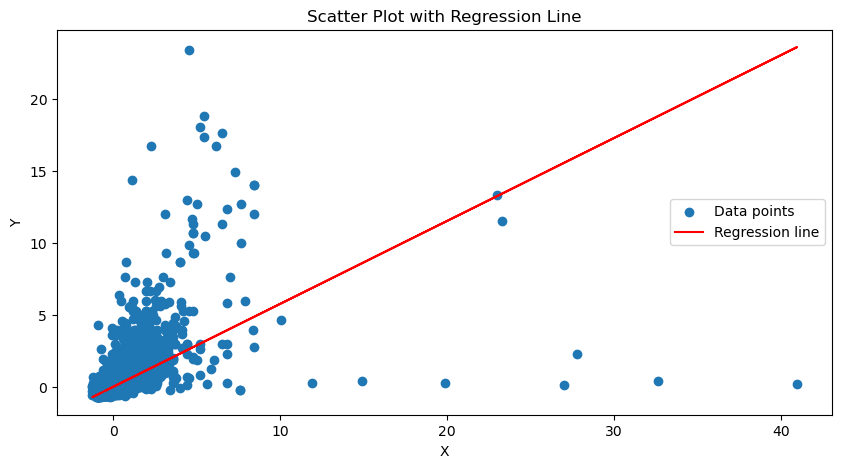

In [13]:
regression_line_2 = theta_1_library * x + theta_0_library

# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(x, regression_line_2, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()